# SIR with scaled additive noise
This is program 6.2 from page 197 of "Modelling Infectious Diseases in Human and Animals" by Keeling & Rohani. This is based on code written by Ilias Soumpasis.

In [4]:
import scipy.integrate as spi
import numpy as np
import matplotlib.pyplot as plt

In [12]:
#parameters (in days)
beta=1.0; #transmission rate
gamma=1/10.0; #recovery rate
mu=1/(50*365.0); #natural death/birth rate

#initial conditions
X0=1e5; #initial susceptibles
Y0=500; #initial infecteds
N0=1e6; #initial total population size

Step=1; #integration step
ND=MaxTime=5*365.0;  #maximum time (number of days)
TS=1.0 #time step

INPUT0=np.hstack((X0,Y0))

In [6]:
def diff_eqs(INP,t):  
	'''The main set of equations'''
	Y=np.zeros((2))
	V = INP     
	Y[0] = (mu*N0 + np.sqrt(mu*N0)*P[0]) - (beta*V[0]*V[1]/N0 \
	+ np.sqrt(beta*V[0]*V[1]/N0)*P[1])	- (mu*V[1] + np.sqrt(mu*V[1])*P[2]);
	Y[1] = (beta*V[0]*V[1]/N0 + np.sqrt(beta*V[0]*V[1]/N0)*P[1]) - \
	(gamma*V[1] + np.sqrt(gamma*V[1])*P[3]) - (mu*V[1] + np.sqrt(mu*V[1])*P[4]);
	return Y   # For odeint

In [13]:
T=np.zeros((int(np.ceil(ND/Step)),1))
RES=np.zeros((int(np.ceil(ND/Step)),2))
INPUT=INPUT0
t=0
loop=0
sqrtStep=np.sqrt(Step)

while t<ND and INPUT[0]>0 and INPUT[1]>0:
	t_start = 0.0; t_end = t_start+Step; t_inc = TS
	t_range = np.arange(t_start, t_end+t_inc, t_inc)
	P=np.random.normal(size=5)/sqrtStep
	PRES = spi.odeint(diff_eqs,INPUT,t_range)
	T[loop]=t=t+Step
	INPUT=PRES[-1]
	RES[loop]=PRES[-1]
	loop += 1

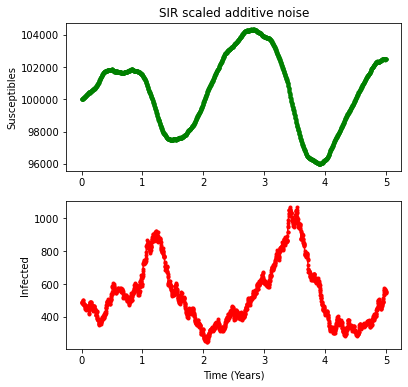

<Figure size 432x288 with 0 Axes>

In [16]:
### plotting
fig=plt.figure(figsize=(6,6))
plt.axis('off')
plt.title('SIR scaled additive noise')
fig.add_subplot(211)
plt.plot(T/365., RES[:,0], '.-g')
#plt.xlabel('Time (Years)')
plt.ylabel('Susceptibles')
fig.add_subplot(212)
plt.plot(T/365., RES[:,1], '.-r')
plt.ylabel('Infected')
plt.xlabel('Time (Years)')

plt.show()
plt.savefig('SIR_scaled_additive_noise.pdf')